## Importing Libraries

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import heapq
from collections import Counter, namedtuple
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets
import timeit
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import sys
from scipy.spatial.distance import cdist
np.random.seed(0)

## Defining parameters

In [9]:
# Experiment parameters
N_values = [100, 500, 1000]  # Dataset sizes
D_values = [2, 10, 50]         # Dimensions
K_values = [1, 3, 5]          # Number of neighbors

## Naive approach

### Algorithm

In [10]:
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        max_heap = []
        for i, x_train in enumerate(X_train):
            distance = np.linalg.norm(x - x_train)  # Compute Euclidean distance
            if len(max_heap) < k:
                heapq.heappush(max_heap, (-distance, y_train[i]))
            else:
                heapq.heappushpop(max_heap, (-distance, y_train[i]))
        
        # Extract labels of the k nearest neighbors
        k_nearest_labels = [label for _, label in max_heap]
        
        # Majority vote to determine the class
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return np.array(predictions), sys.getsizeof(max_heap)

# Define the function to measure
def experiment(X_train, y_train, X_test, y_test, k):
    predictions, auxillary_space = knn_predict(X_train, y_train, X_test, k=k)
    return accuracy_score(y_test, predictions), auxillary_space

# Initialize an empty list to store results
results = []

for N in N_values:
    for D in D_values:
        for K in K_values:
            # Generate a synthetic dataset with blobs
            X, y = datasets.make_blobs(n_samples=N, n_features=D, centers=2, cluster_std=5)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            input_size=sys.getsizeof(X)+sys.getsizeof(y)

            # Measure time
            avg_time = timeit.timeit(lambda: experiment(X_train, y_train, X_test, y_test, K), number=10) / 10  # Run multiple times for better accuracy

            # Measure accuracy
            accuracy, auxillary_space = experiment(X_train, y_train, X_test, y_test, K)  # Accuracy

            # Append results to the list
            results.append({
                "N": N,
                "D": D,
                "K": K,
                "Accuracy": accuracy,
                "Train Time (s)": 0.0,
                "Test Time (s)": avg_time,
                "Train_memory (B)": 0,
                "Test_memory (B)": input_size+auxillary_space,
            })

# Convert the list to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

,N,D,K,Accuracy,Train Time (s),Test Time (s),Train_memory (B),Test_memory (B)
0,100,2,1,0.500,0.0,0.005157,0,2728
1,100,2,3,0.550,0.0,0.004381,0,2728
2,100,2,5,0.800,0.0,0.004424,0,2760
3,100,10,1,1.000,0.0,0.004401,0,9128
4,100,10,3,1.000,0.0,0.004473,0,9128
5,100,10,5,1.000,0.0,0.004498,0,9160
6,100,50,1,1.000,0.0,0.004511,0,41128
7,100,50,3,1.000,0.0,0.004454,0,41128
8,100,50,5,1.000,0.0,0.004462,0,41160
9,500,2,1,0.820,0.0,0.104312,0,12328


#### Testing
##### With heap implementation

$T.C: O(N.D) + O(N.log(K))$

$S.C: O(N.D)$(input space) + $O(K.D)$(auxillary space)

##### Without heap implementation

$T.C: O(N.D) + O(N.log(N))$

$S.C: O(N.D)$(input space) + $O(N.D)$(auxillary space)

### Decision Boundary Visualisation

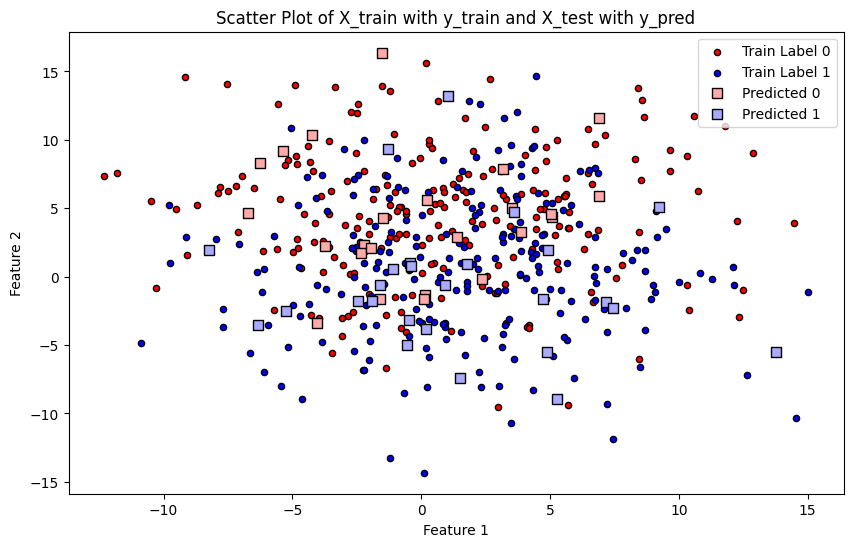

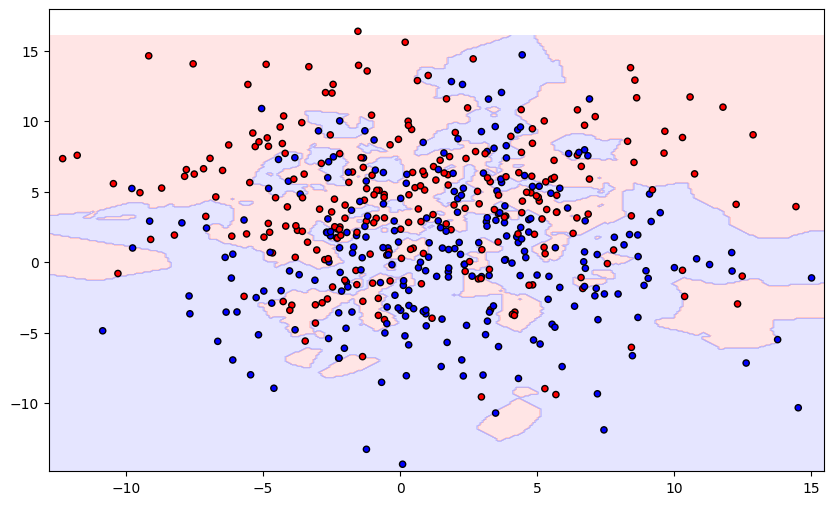

In [12]:
# Parameters for data generation
N = 500  # Number of samples
D = 2     # Number of features (2D for visualization)
K=3       # Number of neighbors
h=0.1    # Mesh grid step size

# Generate a synthetic 2D dataset with blobs
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=5,random_state=0)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

y_pred = knn_predict(X_train, y_train, X_test, k=K)[0]  # Predictions for test set

# Plot X_train with true labels for each class
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='#FF0000', edgecolor='k', s=20, label='Train Label 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='#0000FF', edgecolor='k', s=20, label='Train Label 1')

# Plot X_test with predicted labels for each class
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='#FFAAAA', marker='s', edgecolor='k', s=50, label='Predicted 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='#AAAAFF', marker='s', edgecolor='k', s=50, label='Predicted 1')

plt.title('Scatter Plot of X_train with y_train and X_test with y_pred')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k=K)[0]  # Predictions for test set
Z = Z.reshape(xx.shape)

# Define custom color maps for the decision boundary and scatter plot points
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Light red and light blue for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])      # Red and blue for data points

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Plot the training points with true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20, label='Data')

## KD Tree approach

### Algorithm

In [14]:
# Define a Node in the KD-Tree
Node = namedtuple("Node", ["points", "labels", "left", "right", "axis", "split_value"])

class KDTree:
    def __init__(self, points, labels, min_points=40):
        self.root = self._build_kd_tree(points, labels, depth=0, D=len(points[0]), min_points=min_points)
    
    def _build_kd_tree(self, points, labels, depth, D, min_points):
        # Stop splitting if we have fewer points than min_points
        if len(points) <= min_points:
            return Node(points=points, labels=labels, left=None, right=None, axis=None, split_value=None)

        # Choose axis based on depth
        axis = depth % D

        # Sort points along the chosen axis and find the median
        sorted_points_labels = sorted(zip(points, labels), key=lambda x: x[0][axis])
        median_idx = len(sorted_points_labels) // 2

        # Split points and labels at the median
        left_points_labels = sorted_points_labels[:median_idx]
        right_points_labels = sorted_points_labels[median_idx+1:]

        # Create node and recursively build subtrees
        return Node(
            points=[p for p, _ in sorted_points_labels],
            labels=[l for _, l in sorted_points_labels],
            left=self._build_kd_tree([p for p, _ in left_points_labels], [l for _, l in left_points_labels], depth + 1, D, min_points),
            right=self._build_kd_tree([p for p, _ in right_points_labels], [l for _, l in right_points_labels], depth + 1, D, min_points),
            axis=axis,
            split_value=sorted_points_labels[median_idx][0][axis]
        )
    
    def _search_kd_tree(self, node, point):
        """Traverse the KD-Tree to find the leaf region containing the point."""
        if node.left is None and node.right is None:
            return node

        axis = node.axis
        if point[axis] < node.split_value and node.left is not None:
            return self._search_kd_tree(node.left, point)
        elif node.right is not None:
            return self._search_kd_tree(node.right, point)
        else:
            return node
    
    def find_region(self, point):
        return self._search_kd_tree(self.root, point)

def knn_within_partition(points, labels, query_point, k):
    distances = cdist([query_point], points, metric='euclidean')[0]
    nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = [labels[i] for i in nearest_indices]
    most_common = Counter(k_nearest_labels).most_common(1)[0][0]
    return most_common

def knn_predict_kdtree(X_train, y_train, X_test, k=3, min_points=40):
    # Build the KD-Tree
    kdtree = KDTree(X_train, y_train, min_points=min_points)
    predictions = []
    test_auxillary_space = 0

    for query_point in X_test:
        # Find the region in the KD-Tree that contains the query point
        leaf_node = kdtree.find_region(query_point)

        test_auxillary_space=max(test_auxillary_space,sys.getsizeof(leaf_node.points)+sys.getsizeof(leaf_node.labels))
        
        # Perform naive KNN search within the points in this region
        prediction = knn_within_partition(leaf_node.points, leaf_node.labels, query_point, k)
        predictions.append(prediction)
    
    return np.array(predictions), sys.getsizeof(kdtree), test_auxillary_space


# Function to measure training time
def measure_train_time(X_train, y_train, min_points=40):
    start_time = timeit.default_timer()
    KDTree(X_train, y_train, min_points=min_points)
    return timeit.default_timer() - start_time

# Define the function to measure
def experiment(X_train, y_train, X_test, y_test, k):
    predictions, train_auxillary_space, test_auxillary_space = knn_predict_kdtree(X_train, y_train, X_test, k=k, min_points=40)
    return accuracy_score(y_test, predictions), train_auxillary_space, test_auxillary_space

# Initialize an empty list to store results
results = []

for N in N_values:
    for D in D_values:
        for K in K_values:
            # Generate a synthetic dataset with blobs
            X, y = datasets.make_blobs(n_samples=N, n_features=D, centers=2, cluster_std=5)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            input_size=sys.getsizeof(X)+sys.getsizeof(y)

            # Measure average training time
            avg_train_time = measure_train_time(X_train, y_train)

            # Measure total time and calculate average test time
            total_time = timeit.timeit(lambda: experiment(X_train, y_train, X_test, y_test, K), number=10) / 10
            avg_test_time = total_time - avg_train_time

            # Measure accuracy
            accuracy, train_auxillary_space, test_auxillary_space = experiment(X_train, y_train, X_test, y_test, K)  # Accuracy

            # Append results to the list
            results.append({
                "N": N,
                "D": D,
                "K": K,
                "Accuracy": accuracy,
                "Train Time (s)": avg_train_time,
                "Test Time (s)": avg_test_time,
                "Train_memory (B)": input_size+train_auxillary_space,
                "Test_memory (B)": test_auxillary_space,
            })

# Convert the list to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

,N,D,K,Accuracy,Train Time (s),Test Time (s),Train_memory (B),Test_memory (B)
0,100,2,1,0.900,0.000085,0.000904,2688,752
1,100,2,3,0.900,0.000153,0.000513,2688,752
2,100,2,5,0.900,0.000073,0.000585,2688,752
3,100,10,1,1.000,0.000057,0.000586,9088,752
4,100,10,3,1.000,0.000055,0.000602,9088,752
5,100,10,5,1.000,0.000053,0.000585,9088,752
6,100,50,1,1.000,0.000054,0.000604,41088,752
7,100,50,3,1.000,0.000053,0.000634,41088,752
8,100,50,5,1.000,0.000055,0.000617,41088,752
9,500,2,1,0.940,0.000765,0.001811,12288,624


S=max number of points in leaf node=40

#### Training

T.C of creating a node= $O(N.log(N))$
Total nodes= $O(log(N))$

$T.C= O(N.(log(N))^2)$

input S.C= $O(N.D)$
auxilary S.C= $O(N.D)$

$S.C= O(N.D)$

#### Testing

T.C of knn in leaf node= $O(S.log(S))$ = $O(1)$ (as S is constant=40)

T.C of finding the leaf node= $O(log(N))$

$T.C= O(log(N))$

S.C of applying knn in leaf node= $O(S)$ = $O(1)$ (as S is constant=40)

$S.C= O(1)$

### Decision Boundary Visualisation

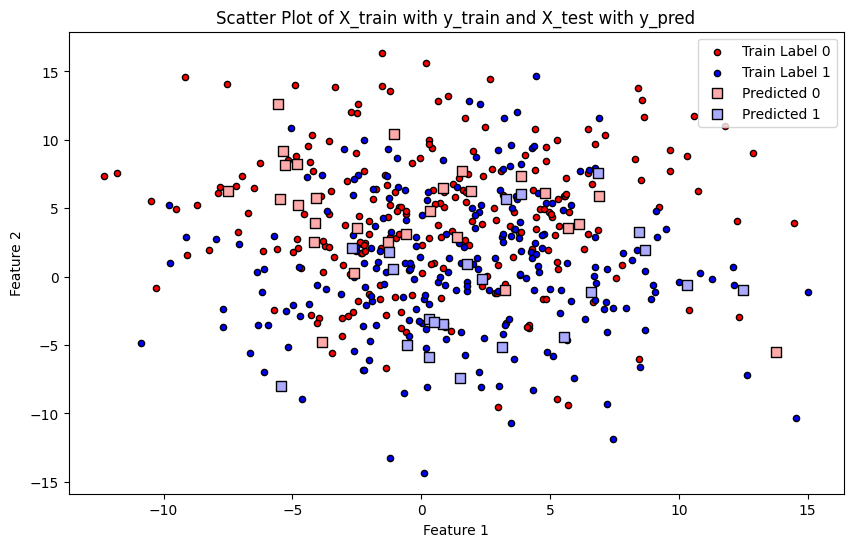

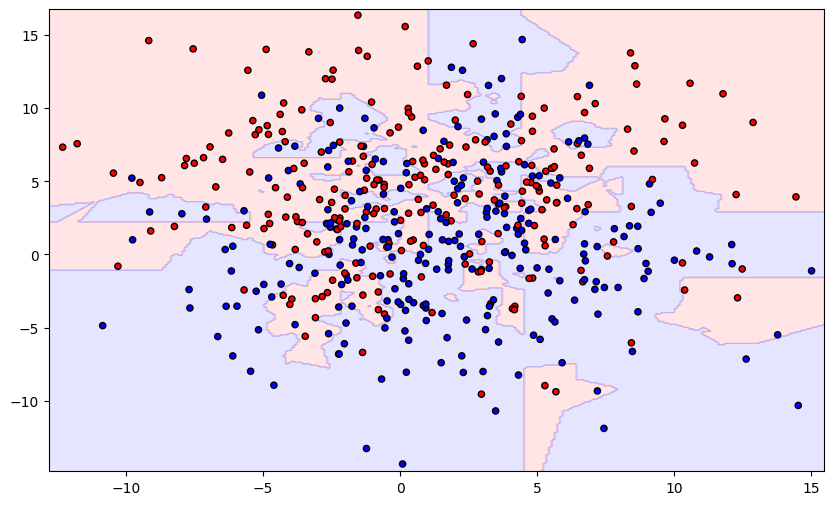

In [15]:
# Parameters for data generation
N = 500  # Number of samples
D = 2     # Number of features (2D for visualization)
K=3       # Number of neighbors
h=0.1    # Mesh grid step size

# Generate a synthetic 2D dataset with blobs
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=5,random_state=0)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

y_pred = knn_predict_kdtree(X_train, y_train, X_test, k=K)[0]  # Predictions for test set

# Plot X_train with true labels for each class
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='#FF0000', edgecolor='k', s=20, label='Train Label 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='#0000FF', edgecolor='k', s=20, label='Train Label 1')

# Plot X_test with predicted labels for each class
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='#FFAAAA', marker='s', edgecolor='k', s=50, label='Predicted 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='#AAAAFF', marker='s', edgecolor='k', s=50, label='Predicted 1')

plt.title('Scatter Plot of X_train with y_train and X_test with y_pred')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_predict_kdtree(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k=K)[0]  # Predictions for test set
Z = Z.reshape(xx.shape)

# Define custom color maps for the decision boundary and scatter plot points
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Light red and light blue for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])      # Red and blue for data points

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Plot the training points with true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20, label='Data')

In [16]:
# Define a HashTable for LSH
HashTable = namedtuple("HashTable", ["hash_table", "projections"])

class LSH:
    def __init__(self, n_projections, n_hash_tables, dimensions):
        self.n_projections = n_projections
        self.n_hash_tables = n_hash_tables
        self.dimensions = dimensions
        self.hash_tables = []
        self.data = None

    def _hash_function(self, point, projection_matrix):
        # Create a binary hash based on random projections
        return tuple((point @ projection_matrix.T) > 0)

    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.hash_tables = []

        # Create multiple hash tables with random projections
        for _ in range(self.n_hash_tables):
            projections = np.random.randn(self.n_projections, self.dimensions)
            hash_table = {}

            # Populate the hash table with points
            for idx, point in enumerate(data):
                hash_value = self._hash_function(point, projections)
                if hash_value not in hash_table:
                    hash_table[hash_value] = []
                hash_table[hash_value].append(idx)

            self.hash_tables.append(HashTable(hash_table=hash_table, projections=projections))

    def _get_candidates(self, point):
        # Retrieve candidates from all hash tables
        candidate_indices = set()
        for hash_table, projections in self.hash_tables:
            hash_value = self._hash_function(point, projections)
            if hash_value in hash_table:
                candidate_indices.update(hash_table[hash_value])
        return list(candidate_indices)

    def query(self, point, k):
        # Get candidate points and perform a naive KNN search among them
        candidate_indices = self._get_candidates(point)
        if not candidate_indices:
            return []

        candidates = self.data[candidate_indices]
        distances = np.linalg.norm(candidates - point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        return [candidate_indices[i] for i in nearest_indices]

def knn_predict_lsh(X_train, y_train, X_test, k=3, n_projections=10, n_hash_tables=5):
    # Initialize and fit the LSH model
    lsh = LSH(n_projections=n_projections, n_hash_tables=n_hash_tables, dimensions=X_train.shape[1])
    lsh.fit(X_train, y_train)

    predictions = []
    test_auxillary_space = 0

    for query_point in X_test:
        # Query the LSH model for k-nearest neighbors
        nearest_indices = lsh.query(query_point, k)
        test_auxillary_space = max(test_auxillary_space, sys.getsizeof(nearest_indices))

        if nearest_indices:
            nearest_labels = [y_train[i] for i in nearest_indices]
            most_common = Counter(nearest_labels).most_common(1)[0][0]
        else:
            most_common = np.random.choice(y_train)  # Fallback if no candidates found

        predictions.append(most_common)

    return np.array(predictions), sys.getsizeof(lsh), test_auxillary_space

# Function to measure training time
def measure_train_time_lsh(X_train, y_train, n_projections=10, n_hash_tables=5):
    start_time = timeit.default_timer()
    lsh = LSH(n_projections=n_projections, n_hash_tables=n_hash_tables, dimensions=X_train.shape[1])
    lsh.fit(X_train, y_train)
    return timeit.default_timer() - start_time

# Define the function to measure
def experiment_lsh(X_train, y_train, X_test, y_test, k, n_projections=10, n_hash_tables=5):
    predictions, train_auxillary_space, test_auxillary_space = knn_predict_lsh(
        X_train, y_train, X_test, k=k, n_projections=n_projections, n_hash_tables=n_hash_tables
    )
    return accuracy_score(y_test, predictions), train_auxillary_space, test_auxillary_space

# Initialize an empty list to store results
results = []

# Define the range of N, D, and K values
N_values = [100, 500, 1000]
D_values = [2, 10, 50]
K_values = [1, 3, 5]

for N in N_values:
    for D in D_values:
        for K in K_values:
            # Generate a synthetic dataset with blobs
            X, y = datasets.make_blobs(n_samples=N, n_features=D, centers=2, cluster_std=5)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            input_size = sys.getsizeof(X) + sys.getsizeof(y)

            # Measure average training time
            avg_train_time = measure_train_time_lsh(X_train, y_train)

            # Measure total time and calculate average test time
            total_time = timeit.timeit(lambda: experiment_lsh(X_train, y_train, X_test, y_test, K), number=10) / 10
            avg_test_time = total_time - avg_train_time

            # Measure accuracy
            accuracy, train_auxillary_space, test_auxillary_space = experiment_lsh(X_train, y_train, X_test, y_test, K)

            # Append results to the list
            results.append({
                "N": N,
                "D": D,
                "K": K,
                "Accuracy": accuracy,
                "Train Time (s)": avg_train_time,
                "Test Time (s)": avg_test_time,
                "Train_memory (B)": input_size + train_auxillary_space,
                "Test_memory (B)": test_auxillary_space,
            })

# Convert the list to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


,N,D,K,Accuracy,Train Time (s),Test Time (s),Train_memory (B),Test_memory (B)
0,100,2,1,0.900,0.001443,0.001156,2688,88
1,100,2,3,0.750,0.001210,0.000969,2688,88
2,100,2,5,0.850,0.001214,0.000932,2688,120
3,100,10,1,1.000,0.001316,0.001102,9088,88
4,100,10,3,0.900,0.001249,0.000834,9088,88
5,100,10,5,1.000,0.001234,0.000878,9088,120
6,100,50,1,0.950,0.001345,0.000821,41088,88
7,100,50,3,1.000,0.001312,0.000854,41088,88
8,100,50,5,1.000,0.001313,0.000995,41088,120
9,500,2,1,0.970,0.006278,0.005205,12288,88


P=number of hyperplanes(in this case P=10)

#### Training

generating W matrix=$O(D.P)$

hashing=$O(N.D.P)$

$T.C=O(N.D.P)$

input S.C= $O(N.D)$
auxilary S.C= $O(D.P)+O(N.P)$

$S.C= O(N.D)+O(D.P)+O(N.P)$

#### Testing

T.C of finding hash of a single query= $O(D.P)$

T.C applying knn in that region of hash=$O(N.D/2^P)$

$T.C= O(D.P)+O(N.D/2^P)$

S.C of hash of query= $O(P)$

S.C of applying knn in hash region= $O(N.D/2^P)$

$S.C= O(P)+O(N.D/2^P)$

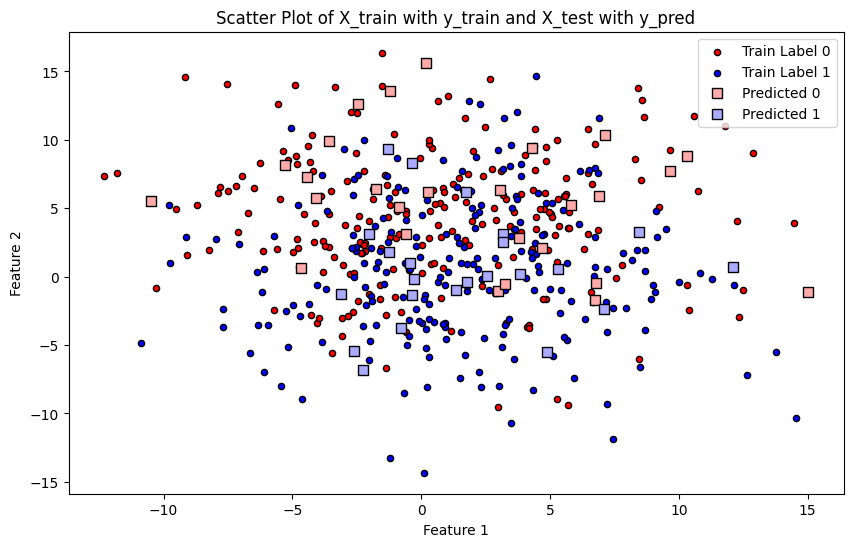

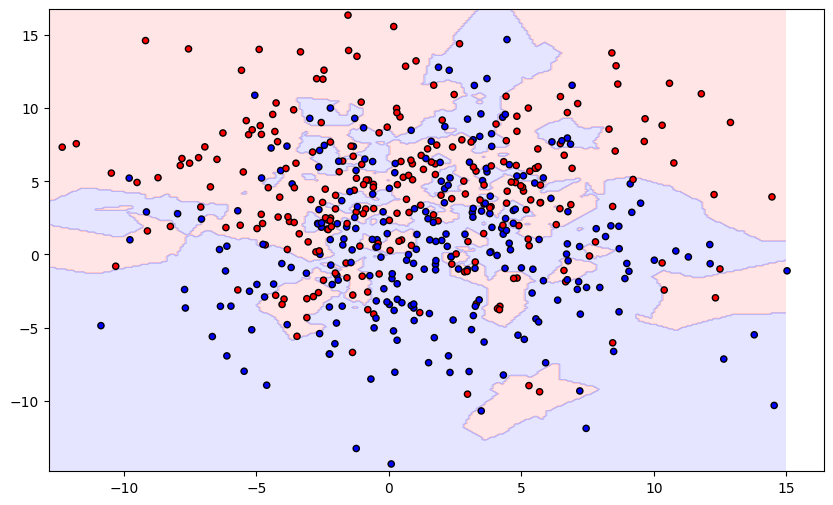

In [17]:
# Parameters for data generation
N = 500  # Number of samples
D = 2     # Number of features (2D for visualization)
K=3       # Number of neighbors
h=0.1    # Mesh grid step size

# Generate a synthetic 2D dataset with blobs
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=5,random_state=0)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

y_pred = knn_predict_lsh(X_train, y_train, X_test, k=K)[0]  # Predictions for test set

# Plot X_train with true labels for each class
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='#FF0000', edgecolor='k', s=20, label='Train Label 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='#0000FF', edgecolor='k', s=20, label='Train Label 1')

# Plot X_test with predicted labels for each class
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='#FFAAAA', marker='s', edgecolor='k', s=50, label='Predicted 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='#AAAAFF', marker='s', edgecolor='k', s=50, label='Predicted 1')

plt.title('Scatter Plot of X_train with y_train and X_test with y_pred')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_predict_lsh(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k=K)[0]  # Predictions for test set
Z = Z.reshape(xx.shape)

# Define custom color maps for the decision boundary and scatter plot points
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Light red and light blue for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])      # Red and blue for data points

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Plot the training points with true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20, label='Data')